In [1]:

from utils.data import Dataset
import time

# Load dataset
dataset = Dataset(dataset_name='GYEONGGI9654')

data = dataset.dataloader.export_the_sequence(['Amount of Consumption'])

Reading data from: https://raw.githubusercontent.com/andrewlee1807/Weights/main/datasets/gyeonggi_univariable/9654_1hour.csv


# 1.Determine the Period of a Time Series with Fast Fourier Transform

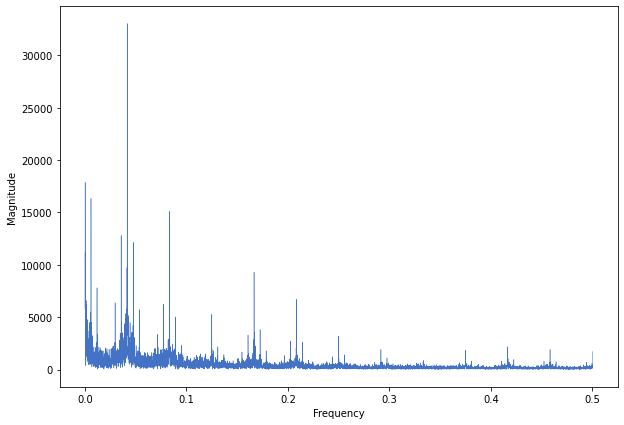

In [14]:
from scipy.fft import rfft, rfftfreq
import numpy as np
import matplotlib.pyplot as plt

nobs = len(data.squeeze())
temperature_ft = np.abs(rfft(data.squeeze()))
temperature_freq = rfftfreq(nobs)

plt.figure(figsize=(10, 7))
plt.plot(temperature_freq[2:], temperature_ft[2:], linewidth=0.5, color='#4472C4')
#annot_max(temperature_freq[2:], temperature_ft[2:])
# plt.title('Amplitude spectrum of the time series')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

In [15]:
from scipy.fft import fft
import numpy as np

t1 = time.time()
# Calculate the Fourier transform
yf = np.fft.fft(data.squeeze())
xf = np.linspace(0.0, 1.0 / (2.0), len(data.squeeze()) // 2)

# Find the dominant frequency
# We have to drop the first element of the fft as it corresponds to the 
# DC component or the average value of the signal
idx = np.argmax(np.abs(yf[1:len(data.squeeze()) // 2]))
freq = xf[idx]

period = (1 / freq)
print(f"The period of the time series is {period} from frequency {freq}")
# The period of the time series is 24.031518624641837
print(f"Time taken: {time.time() - t1} seconds")

The period of the time series is 24.031518624641837 from frequency 0.041612018600214615
Time taken: 0.003001689910888672 seconds


Time taken: 0.0025115013122558594 seconds


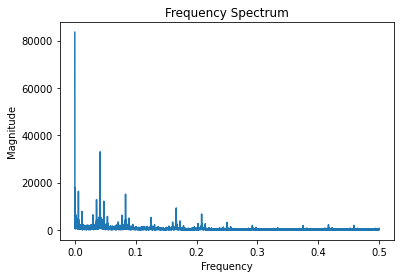

Dominant Period: inf
Top Frequencies and their Magnitudes:
Frequency: 0.00, Magnitude: 83551.52
Frequency: 0.04, Magnitude: 33022.95
Frequency: 0.00, Magnitude: 17863.78
Frequency: 0.01, Magnitude: 16325.53
Frequency: 0.08, Magnitude: 15102.92


C:\Users\Andrew\AppData\Local\Temp/ipykernel_40280/876776858.py:25: RuntimeWarning: divide by zero encountered in double_scalars
  dominant_period = 1 / dominant_frequency


In [9]:
t1 = time.time()
fft_result = np.fft.fft(data.squeeze())
# Compute magnitudes
magnitudes = np.abs(fft_result)

# Get frequencies
sample_count = len(data.squeeze())
sample_rate = 1  # Define the sample rate based on your data's time intervals
frequencies = np.fft.fftfreq(sample_count, d=1./sample_rate)
# Exclude the zero frequency
positive_frequencies = frequencies[:sample_count // 2]
positive_magnitudes = magnitudes[:sample_count // 2]

# Find the index of the peak magnitude
peak_frequency_index = np.argmax(positive_magnitudes)

# Get the dominant frequency
dominant_frequency = positive_frequencies[peak_frequency_index]
print(f"Time taken: {time.time() - t1} seconds")
plt.plot(positive_frequencies, positive_magnitudes)
plt.title('Frequency Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()
dominant_period = 1 / dominant_frequency
print(f"Dominant Period: {dominant_period}")
# Compute FFT and get frequencies and magnitudes
fft_result = np.fft.fft(data.squeeze())
magnitudes = np.abs(fft_result)
frequencies = np.fft.fftfreq(len(data.squeeze()), d=1./sample_rate)

# Exclude zero frequency
positive_frequencies = frequencies[:len(frequencies) // 2]
positive_magnitudes = magnitudes[:len(magnitudes) // 2]

# Combine and sort
freq_magnitude = [(freq, mag) for freq, mag in zip(positive_frequencies, positive_magnitudes)]
sorted_freq_magnitude = sorted(freq_magnitude, key=lambda x: x[1], reverse=True)

# Print top results
top_results_count = 5
print("Top Frequencies and their Magnitudes:")
for i in range(top_results_count):
    freq, mag = sorted_freq_magnitude[i]
    print(f"Frequency: {freq:.2f}, Magnitude: {mag:.2f}")



# 2.Determine the Period of a Time Series with ACF

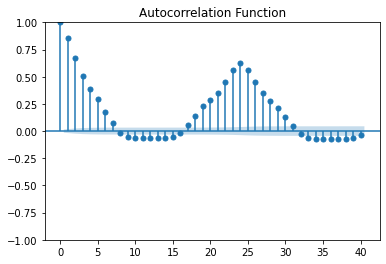

0     1.000000
1     0.857033
2     0.668509
24    0.628842
23    0.560852
dtype: float64
Time taken: 0.11949563026428223 seconds


In [6]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
import pandas as pd

t1 = time.time()
# Plot ACF
acf_values = acf(data.squeeze())
plot_acf(data.squeeze(), lags=40)
plt.title('Autocorrelation Function')
plt.show()
# Create a series from acf values for easy handling
acf_series = pd.Series(acf_values)

# Sort by autocorrelation value while maintaining the lag as index
sorted_acf = acf_series.sort_values(ascending=False)

# Print the top results, for example, top 5
top_results = sorted_acf.head(5)
print(top_results)

print(f"Time taken: {time.time() - t1} seconds")